<h2><font color="3337B0">Le contexte</font></h2>

La trame de données<b><font color="AA33B0"> application_train</font></b> et <b><font color="AA33B0">application_test</font></b> contient le prêt et les demandeurs de prêt.<br> 
La trame de données <b><font color="AA33B0">bureau</font></b>  contient les données d'application d'autres prêts que le client a contractés auprès d'autres établissements de crédit et qui ont été signalés au bureau de crédit.<br>
La trame de données <b><font color="AA33B0">previous_applications</font></b> contient des informations sur les prêts précédents chez <b><font color="AA33B0">Home Credit</font></b> par le même client, des informations sur les prêts précédents et des informations sur le client au moment du prêt (il y a une ligne dans la trame de données par demande de prêt précédente).<br><br>


<h4> <font color="AA33B0">application_{train|test}.csv</h4>

<li>Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).</li>
<li> Des données statiques pour toutes les applications. 
<li> Une ligne représente un prêt dans notre échantillon de données.

<h4><font color="AA33B0">bureau.csv</h4>

<li>Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).</li>
<li>Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

<h4><font color="AA33B0">bureau_balance.csv</h4>

<li>Soldes mensuels des crédits antérieurs au bureau de crédit.</li>
<li>Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes .
    
<h4><font color="AA33B0">POS_CASH_balance.csv</font></h4>

<li>Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.</li>
<li>Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).
    
<h4><font color="AA33B0">credit_card_balance.csv</font></h4>

<li>Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.</li>
<li>Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.
    
<h4><font color="AA33B0">application_précédente.csv</font></h4>

<li>Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.</li>
<li>Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.
    
<h4><font color="AA33B0">versements_paiements.csv</font></h4>

<li>Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.</li>
<li>Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.</li>
<li>Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.
    
<h4><font color="AA33B0">AccueilCredit_columns_description.csv</font></h4>

<li>Ce fichier contient les descriptions des colonnes des différents fichiers de données.

<p><font color="283CC6">SK_ID_CURR</font> connecte les dataframes <font color="AA33B0">application_train|test avec bureau, previous_application</font> et aussi avec les dataframes <font color="AA33B0">POS_CASH_balance, versements_payment et credit_card_balance.</font><p> 

<p><font color="283CC6">SK_ID_PREV</font> connecte les dataframes <font color="AA33B0">previous_application avec bureau, previous_application</font> et aussi avec les dataframes <font color="AA33B0">POS_CASH_balance, versements_payment et credit_card_balance.</font><p>    

<p><font color="283CC6">SK_ID_BUREAU</font> connecte le dataframe <font color="AA33B0">bureau</font> avec le dataframe<font color="AA33B0"> bureau_balance.</font>

<h2><b><font color="blue">Problématique</font></b></h2> 

<div class = "alert alert-info alert-info">

Notre objectif ici est de développer un modèle de scoring de la probabilité de défaut de paiement d'un client pour étayer la décision d'accorder ou non un prêt à un client potentiel en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, ...).<br>

Pour cela, nous allons :<br>
<ul>

<li>Traiter le problème de : 'Imbalanced Data'.</li><br> 
<li>Tester des différents modèles de classification en optimisant leurs hyperparamètres.</li><br>
<li>Evaluer les performances des modèles en se basant sur des scores de classification.</li><br>
<li>Construire une métrique Monétaire / Bancaire en pénalisant le défaut.</li><br>
<li>Optimiser le seuil de décision ( le seuil de solvabilité ).</li><br>
<li>Sélectioner des caractéristiques de modèle (feature importance).</li><br>
    
</ul>


<h2><font color="3337B0">Importons les modules nécessaires</font></h2>

In [1]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder

## Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline, Pipeline

from collections import Counter

##Split
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold

## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from scipy.stats import uniform as sp_randint
from scipy.stats import uniform as sp_randFloat


from zipfile import ZipFile

## Scores
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score, precision_score
from sklearn.metrics import fbeta_score, classification_report
from sklearn.metrics import precision_recall_fscore_support

import scikitplot as skplt

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve, cross_validate

from sklearn.feature_selection import RFECV

## feature importance
import shap

## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle
import re
import time

## Warning
import warnings
warnings.filterwarnings("ignore")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h2><font color="3337B0">Chargeons le dataset résultant</font></h2>

In [2]:
dataset = pd.read_csv('Projet_7_df_final.csv')

In [3]:
dataset.shape

(307511, 37)

In [4]:
dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_CREDIT_y,DAYS_DECISION,CNT_PAYMENT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.038818e+06,9251.775000,179055.00,-606.000000,24.000000,Approved,XAP,New,15.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.281150e+06,56553.990000,484191.00,-1305.000000,10.000000,Approved,XAP,Refreshed,5.785714,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.564014e+06,5357.250000,20106.00,-815.000000,4.000000,Approved,XAP,New,2.250000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1.932462e+06,23651.175000,291695.50,-272.444444,23.000000,Approved,XAP,Repeater,8.650000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2.157812e+06,12278.805000,166638.75,-1222.833333,20.666667,Approved,XAP,Repeater,8.969697,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,2.248017e+06,6605.910000,40455.00,-273.000000,8.000000,Approved,XAP,New,4.375000,0.000000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,1.503599e+06,10074.465000,56821.50,-2497.000000,6.000000,Approved,XAP,New,3.000000,0.000000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.677221e+06,4770.405000,20625.75,-2380.000000,5.000000,Approved,XAP,Refreshed,2.000000,0.294118
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,1.904658e+06,10681.132500,134439.75,-299.500000,15.000000,Approved,XAP,Repeater,10.350000,0.000000


In [5]:
dataset.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT_x                       0
AMT_ANNUITY_x                     12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
CNT_FAM_MEMBERS                    2
AMT_REQ_CREDIT_BUREAU_YEAR     41519
DAYS_EMPLOYED_OUTLIERS             0
CREDIT_ACTIVE                  44020
DAYS_CREDIT                    44020
AMT_CREDIT_SUM                 44021
AMT_BALANCE                   220606
AMT_PAYMENT_TOTAL_CURRENT     220606
SK_DPD_x                      220606
SK_DPD_DEF                    220606
DAYS_INSTALMENT_delay          55554
AMT_INSTALMENT_delta           55554
S

In [6]:
dataset.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT_x                  float64
AMT_ANNUITY_x                 float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
CNT_FAM_MEMBERS               float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
DAYS_EMPLOYED_OUTLIERS           bool
CREDIT_ACTIVE                  object
DAYS_CREDIT                   float64
AMT_CREDIT_SUM                float64
AMT_BALANCE                   float64
AMT_PAYMENT_TOTAL_CURRENT     float64
SK_DPD_x                      float64
SK_DPD_DEF                    float64
DAYS_INSTALMENT_delay         float64
AMT_INSTALME

In [7]:
train_len = dataset.shape[0]

In [8]:
train_dataset = dataset[:train_len]
train_ids = train_dataset['SK_ID_CURR']
train_dataset.drop(columns=['SK_ID_CURR'], axis = 1, inplace=True)

In [9]:
# separate training data
train_dataset['TARGET'] = train_dataset['TARGET'].astype(int)
target = train_dataset['TARGET']
features = train_dataset.drop(columns=['TARGET'], axis = 1)
print('x_train data shape: ', features.shape)
print('y_train data shape: ', target.shape)

x_train data shape:  (307511, 35)
y_train data shape:  (307511,)


In [10]:
target_sample = target
target_sample.shape

(307511,)

In [11]:
features_sample = features
features_sample.shape

(307511, 35)

<h2><font color="3337B0">Preprocessing</font></h2>

<div class = "alert alert-info alert-info">
Le prétraitement des données est le suivant:<br>

<ul>       
<li>Fractionnement du jeu de données (40% test set).</li>
<li>Définir les attributs (numériques , catégoriques ...)</li>
<li>Compléter les données manquantes (Imputation)</li>
</ul>    
 
Les variables numériques : Médiane (car variables asymétriques). Les variables catégoriques : le plus fréquent.<br>

<ul>   
<li>Mise à l'échelle des fonctionnalités (Robust scaler(plus fiable vis à vis des outliers)).</li>
<li>Encodage des données catégorielles.</li>
</ul>

In [12]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(features_sample, target_sample, test_size = 0.4)

In [13]:
# Define categorical columns
categoric_attribute = list(features_sample.select_dtypes(include=["object"]).columns)
# Define numerical columns
numeric_attribute = list(features_sample.select_dtypes(include=["int","float"]).columns)

In [14]:
numeric_attribute

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DAYS_CREDIT',
 'AMT_CREDIT_SUM',
 'AMT_BALANCE',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'SK_DPD_x',
 'SK_DPD_DEF',
 'DAYS_INSTALMENT_delay',
 'AMT_INSTALMENT_delta',
 'SK_ID_PREV',
 'AMT_ANNUITY_y',
 'AMT_CREDIT_y',
 'DAYS_DECISION',
 'CNT_PAYMENT',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD_y']

In [15]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
for col in numeric_attribute:
    X_train[col] = imputer.fit_transform(X_train[col].values.reshape(-1,1))[:,0]
    X_test[col] = imputer.transform(X_test[col].values.reshape(-1,1))[:,0]

In [16]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
for col in categoric_attribute:
    X_train[col] = imputer.fit_transform(X_train[col].values.reshape(-1,1))[:,0]
    X_test[col] = imputer.transform(X_test[col].values.reshape(-1,1))[:,0]

In [17]:
# rbs = RobustScaler()
# for col in numeric_attribute:
#     X_train[col] = rbs.fit_transform(X_train[col].values.reshape(-1,1))[:,0]
#     X_test[col] = rbs.transform(X_test[col].values.reshape(-1,1))[:,0]

In [18]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_CREDIT_y,DAYS_DECISION,CNT_PAYMENT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
171635,Cash loans,F,N,N,0.0,157500.0,1288350.0,37669.5,1125000.0,working,...,1.955074e+06,13359.78000,70922.250000,-1148.500000,6.00,Approved,XAP,Refreshed,1.928571,3.357143
33252,Cash loans,F,N,N,0.0,135000.0,284400.0,16011.0,225000.0,working,...,1.762682e+06,17151.62625,267373.687500,-1605.875000,21.25,Approved,XAP,Repeater,15.539474,0.000000
23652,Revolving loans,M,N,Y,0.0,94500.0,292500.0,14625.0,292500.0,working,...,1.970008e+06,9820.79100,90618.750000,-425.625000,23.60,Refused,XAP,Repeater,15.354839,0.000000
105651,Cash loans,M,N,Y,1.0,112500.0,168102.0,17964.0,148500.0,working,...,1.944948e+06,17040.89700,111020.400000,-772.400000,10.40,Approved,XAP,Repeater,4.291667,0.041667
149463,Cash loans,M,Y,Y,3.0,202500.0,518562.0,24160.5,463500.0,working,...,1.951479e+06,9092.76750,134505.000000,-1907.000000,17.00,Approved,XAP,New,9.861111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234115,Cash loans,M,N,N,0.0,270000.0,316125.0,20709.0,261000.0,working,...,1.936834e+06,21586.79000,214879.909091,-639.545455,16.00,Approved,XAP,Repeater,9.327869,0.344262
184270,Cash loans,F,N,N,0.0,112500.0,545040.0,26640.0,450000.0,working,...,2.303862e+06,18918.81000,208863.000000,-340.000000,24.00,Approved,XAP,New,14.684211,0.000000
11644,Cash loans,M,N,Y,0.0,76500.0,161595.0,14949.0,139500.0,working,...,1.574136e+06,15479.77500,96212.250000,-2283.500000,8.00,Approved,XAP,New,3.500000,0.833333
294560,Cash loans,F,N,Y,0.0,157500.0,1096020.0,55962.0,900000.0,working,...,1.602929e+06,7112.83500,62428.500000,-781.666667,10.00,Approved,XAP,Repeater,5.235294,0.000000


In [19]:
X_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_CREDIT_y,DAYS_DECISION,CNT_PAYMENT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
150964,Cash loans,M,Y,Y,2.0,67023.0,607500.0,26208.0,607500.0,working,...,2.363233e+06,23875.177500,404489.250000,-521.500000,33.000000,Canceled,XAP,Refreshed,3.600000,0.000000
274298,Cash loans,F,N,Y,0.0,202500.0,388066.5,24930.0,351000.0,working,...,2.023861e+06,11386.410000,75009.375000,-431.625000,10.000000,Canceled,XAP,Repeater,12.789474,0.000000
99697,Cash loans,F,N,Y,0.0,229500.0,1845000.0,93856.5,1845000.0,working,...,1.579423e+06,44082.585000,204513.750000,-345.000000,23.000000,Canceled,XAP,Refreshed,11.428571,0.000000
61230,Cash loans,M,N,Y,0.0,202500.0,1054773.0,34987.5,945000.0,working,...,1.959489e+06,5487.783750,51031.125000,-737.000000,11.000000,Approved,XAP,Repeater,6.129032,0.000000
195077,Cash loans,F,N,Y,0.0,225000.0,563877.0,28921.5,504000.0,working,...,1.985636e+06,8847.270000,68133.656250,-349.187500,12.000000,Canceled,XAP,Repeater,19.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227008,Cash loans,M,Y,N,0.0,144000.0,675000.0,36747.0,675000.0,working,...,1.897923e+06,26385.795000,158751.000000,-288.000000,3.000000,Approved,XAP,New,3.000000,0.000000
84824,Cash loans,F,Y,Y,0.0,225000.0,274500.0,26869.5,274500.0,working,...,1.845159e+06,13628.074091,180293.884615,-734.153846,16.909091,Approved,XAP,Repeater,6.680556,0.541667
229878,Cash loans,M,Y,Y,0.0,135000.0,339948.0,35842.5,315000.0,working,...,1.627240e+06,30362.850000,176051.700000,-759.200000,12.000000,Approved,XAP,Repeater,7.105263,0.000000
206937,Cash loans,M,Y,N,2.0,135000.0,266652.0,17172.0,202500.0,working,...,2.143990e+06,5114.160000,21565.500000,-646.333333,8.000000,Approved,XAP,Repeater,5.000000,0.000000


In [20]:
categoric_attribute

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'CREDIT_ACTIVE',
 'NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE']

In [21]:
for c in categoric_attribute:
    print(c)
    print (X_train[c].unique())
    print('*'*30)

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
******************************
CODE_GENDER
['F' 'M' 'XNA']
******************************
FLAG_OWN_CAR
['N' 'Y']
******************************
FLAG_OWN_REALTY
['N' 'Y']
******************************
NAME_INCOME_TYPE
['working' 'not_working']
******************************
NAME_EDUCATION_TYPE
['high_educ' 'low_educ']
******************************
NAME_FAMILY_STATUS
['married' 'other' 'not_married']
******************************
NAME_HOUSING_TYPE
['apartment' 'living_with_parents']
******************************
CREDIT_ACTIVE
['Closed' 'Active' 'Sold']
******************************
NAME_CONTRACT_STATUS
['Approved' 'Refused' 'Canceled' 'Unused offer']
******************************
CODE_REJECT_REASON
['XAP' 'HC' 'LIMIT' 'SYSTEM' 'SCOFR' 'CLIENT' 'SCO' 'VERIF' 'XNA']
******************************
NAME_CLIENT_TYPE
['Refreshed' 'Repeater' 'New' 'XNA']
******************************


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


cat_train = X_train[categoric_attribute]
cat_test = X_test[categoric_attribute]

cat_train = cat_train.apply(lambda categoric_attribute: le.fit_transform(categoric_attribute))
cat_test = cat_test.apply(lambda categoric_attribute: le.fit_transform(categoric_attribute))

cat_train.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CREDIT_ACTIVE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE
171635,0,0,0,0,1,0,0,0,1,0,7,1
33252,0,0,0,0,1,1,2,0,1,0,7,2
23652,1,1,0,1,1,1,0,0,0,2,7,2


In [23]:
tab_train = X_train.copy()
tab_train[categoric_attribute] = cat_train
X_train = tab_train.copy()

In [24]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_CREDIT_y,DAYS_DECISION,CNT_PAYMENT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
171635,0,0,0,0,0.0,157500.0,1288350.0,37669.5,1125000.0,1,...,1.955074e+06,13359.78000,70922.250000,-1148.500000,6.00,0,7,1,1.928571,3.357143
33252,0,0,0,0,0.0,135000.0,284400.0,16011.0,225000.0,1,...,1.762682e+06,17151.62625,267373.687500,-1605.875000,21.25,0,7,2,15.539474,0.000000
23652,1,1,0,1,0.0,94500.0,292500.0,14625.0,292500.0,1,...,1.970008e+06,9820.79100,90618.750000,-425.625000,23.60,2,7,2,15.354839,0.000000
105651,0,1,0,1,1.0,112500.0,168102.0,17964.0,148500.0,1,...,1.944948e+06,17040.89700,111020.400000,-772.400000,10.40,0,7,2,4.291667,0.041667
149463,0,1,1,1,3.0,202500.0,518562.0,24160.5,463500.0,1,...,1.951479e+06,9092.76750,134505.000000,-1907.000000,17.00,0,7,0,9.861111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234115,0,1,0,0,0.0,270000.0,316125.0,20709.0,261000.0,1,...,1.936834e+06,21586.79000,214879.909091,-639.545455,16.00,0,7,2,9.327869,0.344262
184270,0,0,0,0,0.0,112500.0,545040.0,26640.0,450000.0,1,...,2.303862e+06,18918.81000,208863.000000,-340.000000,24.00,0,7,0,14.684211,0.000000
11644,0,1,0,1,0.0,76500.0,161595.0,14949.0,139500.0,1,...,1.574136e+06,15479.77500,96212.250000,-2283.500000,8.00,0,7,0,3.500000,0.833333
294560,0,0,0,1,0.0,157500.0,1096020.0,55962.0,900000.0,1,...,1.602929e+06,7112.83500,62428.500000,-781.666667,10.00,0,7,2,5.235294,0.000000


In [25]:
tab_test = X_test.copy()
tab_test[categoric_attribute] = cat_test

In [26]:
X_test = tab_test.copy()

In [27]:
X_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_CREDIT_y,DAYS_DECISION,CNT_PAYMENT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
150964,0,1,1,1,2.0,67023.0,607500.0,26208.0,607500.0,1,...,2.363233e+06,23875.177500,404489.250000,-521.500000,33.000000,1,7,1,3.600000,0.000000
274298,0,0,0,1,0.0,202500.0,388066.5,24930.0,351000.0,1,...,2.023861e+06,11386.410000,75009.375000,-431.625000,10.000000,1,7,2,12.789474,0.000000
99697,0,0,0,1,0.0,229500.0,1845000.0,93856.5,1845000.0,1,...,1.579423e+06,44082.585000,204513.750000,-345.000000,23.000000,1,7,1,11.428571,0.000000
61230,0,1,0,1,0.0,202500.0,1054773.0,34987.5,945000.0,1,...,1.959489e+06,5487.783750,51031.125000,-737.000000,11.000000,0,7,2,6.129032,0.000000
195077,0,0,0,1,0.0,225000.0,563877.0,28921.5,504000.0,1,...,1.985636e+06,8847.270000,68133.656250,-349.187500,12.000000,1,7,2,19.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227008,0,1,1,0,0.0,144000.0,675000.0,36747.0,675000.0,1,...,1.897923e+06,26385.795000,158751.000000,-288.000000,3.000000,0,7,0,3.000000,0.000000
84824,0,0,1,1,0.0,225000.0,274500.0,26869.5,274500.0,1,...,1.845159e+06,13628.074091,180293.884615,-734.153846,16.909091,0,7,2,6.680556,0.541667
229878,0,1,1,1,0.0,135000.0,339948.0,35842.5,315000.0,1,...,1.627240e+06,30362.850000,176051.700000,-759.200000,12.000000,0,7,2,7.105263,0.000000
206937,0,1,1,0,2.0,135000.0,266652.0,17172.0,202500.0,1,...,2.143990e+06,5114.160000,21565.500000,-646.333333,8.000000,0,7,2,5.000000,0.000000


<h2><font color="3337B0">Sur-échantillonnage des données à l'aide de SMOTE</font></h2>

In [28]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    
    
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    plt.title(model)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    plt.title(model)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
   


In [29]:
%%time
lr = LogisticRegression(C = 0.0001, max_iter=100)
lr.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lr.predict(X_test)))

AUC : 0.5768
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    113100
           1       0.00      0.00      0.00      9905

    accuracy                           0.92    123005
   macro avg       0.46      0.50      0.48    123005
weighted avg       0.85      0.92      0.88    123005

Wall time: 5.38 s


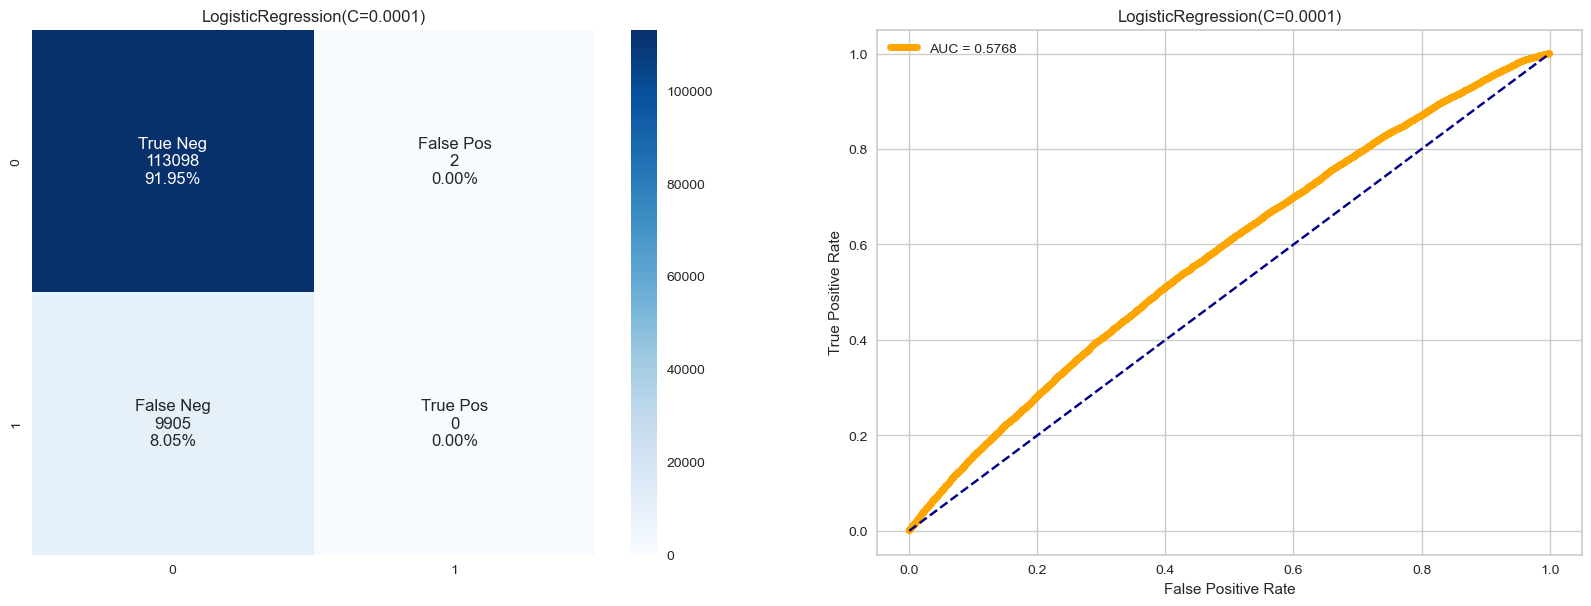

In [30]:
cf_matrix_roc_auc(lr, y_test, lr.predict(X_test), lr.predict_proba(X_test)[:,1])

<div class = "alert alert-info alert-info">
<ul>
<li>Le sous-échantillonnage aléatoire (random undersampling) des observations majoritaires : on retire aléatoirement des observations majoritaires</li>
<li>Le sur-échantillonnage aléatoire (random oversampling) des observations minoritaires : on tire au hasard des individus minoritaires que l’on rajoute aux données.</li>
<li>Le sur-échantillonnage synthétique (SMOTE pour Synthetic Minority Oversampling Technique) produit des observations minoritaires ressemblantes mais distinctes de celles déjà existantes.</li>
</ul>
L'idée est de combiner SMOTE avec une technique de sous-échantillonnage (ENN, Tomek) pour augmenter l'efficacité de la gestion de la classe déséquilibrée.

In [31]:
# définisson la stratégie SMOTE
sm = SMOTE(random_state=42)
# Définir les liens SMOTE-Tomek (sur-échantillonnage suivi d'un sous-échantillonnage)
smtomek=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# définir la stratégie de suréchantillonnage
oversample = RandomOverSampler(sampling_strategy='minority')
# définir la stratégie de sous-échantillonnage
undersample = RandomUnderSampler(sampling_strategy='majority')

In [32]:
def resampling (features, target, resample):
    print('Original dataset shape %s' % Counter(target))
    X, y = resample.fit_resample(features, target)
    print('Resampled dataset shape %s' % Counter(y))
    return X, y

In [33]:
#X_train_sm,y_train_sm = resampling (X_train_transformed, y_train, sm)

In [34]:
%%time
X_train_smtomek,y_train_smtomek = resampling (X_train, y_train, smtomek)

Original dataset shape Counter({0: 169586, 1: 14920})
Resampled dataset shape Counter({1: 169586, 0: 168328})
Wall time: 39min 15s


In [35]:
%%time
X_test_smtomek,y_test_smtomek = resampling(X_test, y_test, smtomek)

Original dataset shape Counter({0: 113100, 1: 9905})
Resampled dataset shape Counter({1: 113100, 0: 112255})
Wall time: 17min 21s


In [260]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: 14828 
Label 0, Before using SMOTE: 169678 


In [ ]:
%%time
sm = SMOTE(random_state=2)
X_train_smtomek, y_train_smtomek = sm.fit_resample(X_train, y_train)

In [ ]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_res==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_res==0)))

In [36]:
%%time
lr = LogisticRegression(C = 0.0001, max_iter=100)
lr.fit(X_train_smtomek, y_train_smtomek)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, lr.predict(X_test)))

AUC : 0.6067
              precision    recall  f1-score   support

           0       0.94      0.51      0.67    113100
           1       0.10      0.63      0.18      9905

    accuracy                           0.52    123005
   macro avg       0.52      0.57      0.42    123005
weighted avg       0.87      0.52      0.63    123005

Wall time: 8.23 s


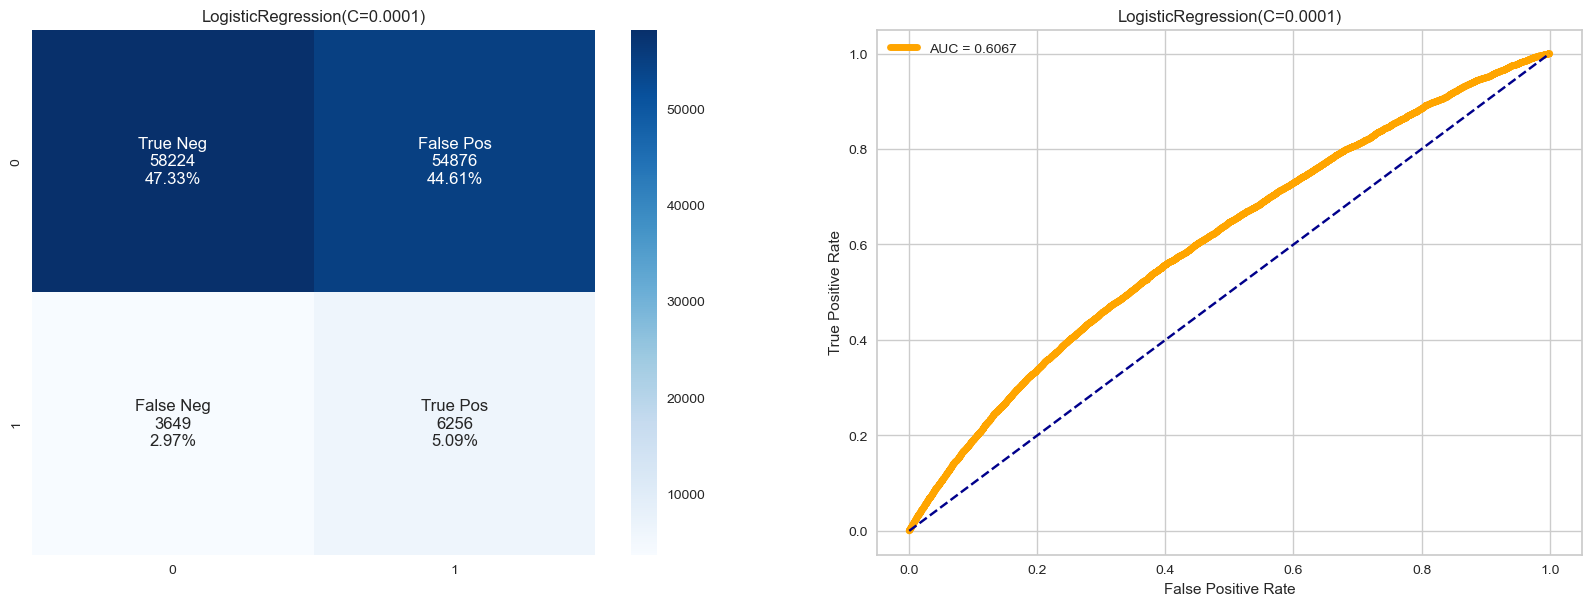

In [37]:
cf_matrix_roc_auc(lr, y_test, lr.predict(X_test), lr.predict_proba(X_test)[:,1])

In [38]:
%%time
pd.DataFrame(X_train_smtomek).to_csv('X_train_smtomek.csv',index=False)
pd.DataFrame(y_train_smtomek).to_csv('y_train_smtomek.csv',index=False)
pd.DataFrame(X_test_smtomek).to_csv('X_test_smtomek.csv',index=False)
pd.DataFrame(y_test_smtomek).to_csv('y_test_smtomek.csv',index=False)

Wall time: 19.3 s


In [39]:
%%time
X_train_1 = pd.read_csv('X_train_smtomek.csv' )
y_train_1 = pd.read_csv('y_train_smtomek.csv' )
X_test_1 = pd.read_csv('X_test_smtomek.csv' )
y_test_1 = pd.read_csv('y_test_smtomek.csv' )

Wall time: 3.99 s


In [40]:
print('Taille de X_train_1  : ',X_train_1.shape)
print('Taille de y_train_1  : ',y_train_1.shape)
print('Taille de X_test_1   : ',X_test_1.shape)
print('Taille de y_test_1   : ',y_test_1.shape)

Taille de X_train_1  :  (337914, 35)
Taille de y_train_1  :  (337914, 1)
Taille de X_test_1   :  (225355, 35)
Taille de y_test_1   :  (225355, 1)


In [41]:
999

999

In [43]:
X_train_1  

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_CREDIT_y,DAYS_DECISION,CNT_PAYMENT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
0,0,0,0,0,0.000000,157500.000000,1.288350e+06,37669.500000,1.125000e+06,1,...,1.955074e+06,13359.780000,70922.250000,-1148.500000,6.000000,0,7,1,1.928571,3.357143
1,0,0,0,0,0.000000,135000.000000,2.844000e+05,16011.000000,2.250000e+05,1,...,1.762682e+06,17151.626250,267373.687500,-1605.875000,21.250000,0,7,2,15.539474,0.000000
2,1,1,0,1,0.000000,94500.000000,2.925000e+05,14625.000000,2.925000e+05,1,...,1.970008e+06,9820.791000,90618.750000,-425.625000,23.600000,2,7,2,15.354839,0.000000
3,0,1,0,1,1.000000,112500.000000,1.681020e+05,17964.000000,1.485000e+05,1,...,1.944948e+06,17040.897000,111020.400000,-772.400000,10.400000,0,7,2,4.291667,0.041667
4,0,1,1,1,3.000000,202500.000000,5.185620e+05,24160.500000,4.635000e+05,1,...,1.951479e+06,9092.767500,134505.000000,-1907.000000,17.000000,0,7,0,9.861111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337909,0,0,0,1,0.000000,90580.203170,2.923899e+05,19134.000000,2.345802e+05,1,...,1.773899e+06,19743.326442,217331.200197,-609.599727,21.695867,0,7,2,17.272153,0.000000
337910,0,0,0,0,0.903759,105401.481298,2.412792e+05,18218.977781,2.250000e+05,1,...,1.693188e+06,10694.971897,128808.863214,-866.889244,18.080296,0,7,1,12.838459,0.000000
337911,0,0,0,1,0.631415,171706.833611,9.675109e+05,37706.708832,9.000000e+05,1,...,1.964951e+06,16973.427357,161561.541104,-1159.659910,12.136547,0,7,2,6.920501,0.045101
337912,0,0,0,1,0.000000,215664.709772,1.308021e+06,38374.902282,1.058146e+06,1,...,1.764899e+06,13569.432938,142097.456290,-995.284012,11.648941,0,5,1,11.278904,0.952338


<h2><font color="3337B0">Modélisation</font></h2>

# mod SABINE

In [29]:
'''
def model_optimisation (classifier, param_grid, scoring, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring=scoring, cv=cv)
    grid_search.fit(X, y)
    return grid_search.best_score_,grid_search.best_params_,grid_search.best_estimator_

In [30]:
### Random forest
'''
n_estimators = [140,150,160]
max_depth = range(2,5)
criterions = ['gini', 'entropy']
rf_parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions}
RFC = RandomForestClassifier(max_features='auto')
scorers = {
    'roc_auc':'roc_auc',
    'bank_score': make_scorer(bank_score)
}

NameError: name 'bank_score' is not defined

In [ ]:
### Light GBM
'''light_gbm_params = {
        'max_depth': (6, 10),
        'num_leaves':(15, 20),
        #'min_data_in_leaf': (230, 250),
               }
#score = 'precision_recall_fscore_support'
LGBM = lgb.LGBMClassifier(random_state=0, n_estimators=3000)
scorers = {
    'roc_auc':'roc_auc',
    'bank_score': make_scorer(bank_score)
}

In [49]:
#  NON  NON
'''
weights=(np.linspace(10.0, 20.0, num = 3,dtype= float)) 

LOGREG_rand_params= [{'max_iter':sp_randint(500, 5000),
                      'C': np.logspace(-4, 4, 20),
                      'class_weight': [{0:1, 1:20}]   # 13=>0.38 ; 20=> 0.44      
                     }]
    
RFC_rand_params= [{'n_estimators' :[100,500],
                   'max_depth':[3,5,None],
                   'max_features':sp_randint(1,3),
                   'criterion':['gini'], # ,'entropy'   # Cost function
                   'bootstrap':[True,False],
                   'min_samples_leaf':sp_randint(1,4),
                   'class_weight': [{0:1, 1:20}]
                  }]

XXX_LGBM_rand_params=[{'nthread':[2,6],
                   'n_estimators':[300,700,1000],
                   'learning_rate':sp_randFloat(0.02,0.2),
                   'num_leaves':[30,35],
                   'max_depth':[5,10,15],
                   'min_child_weight':[35,40],
                   'scale_pos_weight': {0:1, 1:20}
                  }]
            
LGBM_rand_params={'n_estimators':[300,700],
                   'max_depth': (6, 10),
                    'num_leaves':(15, 20)}
        
Dummy_rand_params= [{'strategy':['stratified']               
    
    
#XGBC_rand_params= [{'n_estimators':sp_randint(100, 500,1000),
#                    'learning_rate':sp_randFloat(0.05,0.1),
#                    'max_depth':sp_randint(5, 20),
#                    'scale_pos_weight': weights, #for x in weights],
#                    'objective':['binary:logistic']
#                  }]'''



"\nweights=(np.linspace(10.0, 20.0, num = 3,dtype= float)) \n\nLOGREG_rand_params= [{'max_iter':sp_randint(500, 5000),\n                      'C': np.logspace(-4, 4, 20),\n                      'class_weight': [{0:1, 1:20}]   # 13=>0.38 ; 20=> 0.44      \n                     }]\n    \nRFC_rand_params= [{'n_estimators' :[100,500],\n                   'max_depth':[3,5,None],\n                   'max_features':sp_randint(1,3),\n                   'criterion':['gini'], # ,'entropy'   # Cost function\n                   'bootstrap':[True,False],\n                   'min_samples_leaf':sp_randint(1,4),\n                   'class_weight': [{0:1, 1:20}]\n                  }]\n\nXXX_LGBM_rand_params=[{'nthread':[2,6],\n                   'n_estimators':[300,700,1000],\n                   'learning_rate':sp_randFloat(0.02,0.2),\n                   'num_leaves':[30,35],\n                   'max_depth':[5,10,15],\n                   'min_child_weight':[35,40],\n                   'scale_pos_weight

# mod AHAMEG

In [44]:
#   Instanciation des différents modèles 

LOGREG_clf = LogisticRegression() # solver='lbfgs', max_iter=500
DUMMY_clf = DummyClassifier()
RFC_clf= RandomForestClassifier()
LGBM_clf=LGBMClassifier()



XXX_RFC_clf= RandomForestClassifier(max_features='sqrt')
XXX_LGBM_clf=LGBMClassifier(random_state=42, n_estimators=3000)



estimators = [("DummyClassifier", DUMMY_clf),    
              
              ("RandomForestClassifier", RFC_clf),               
              ("LogisticRegression", LOGREG_clf) ,
              ("LightGBM",LGBM_clf) ]


In [45]:
# Hyperparametres utilisés pour RandomizedSearchCV 
weights=(np.linspace(10.0, 20.0, num = 3,dtype= float)) 

LOGREG_rand_params= [{'max_iter':[600],
                      'C': np.logspace(-4, 4, 20),
                      'class_weight': [{0:1, 1:20}]   # 13=>0.38 ; 20=> 0.44      
                     }]
    
RFC_rand_params = {'n_estimators':[140,150,160],
              'max_depth':range(2,5),
              'criterion': ['gini', 'entropy']}



LGBM_rand_params = {'n_estimators':[300,700],
                    'max_depth': (6, 10),
                    'num_leaves':(15, 20)}
        
Dummy_rand_params= {'strategy':['stratified'] }  
    
    
    
XXXRFC_rand_params= [{'n_estimators' :[100],
                   'max_depth':[5],
                   'max_features':[3],
                   'criterion':['gini'], # ,'entropy'   # Cost function
                   'bootstrap':[True,False],
                   'min_samples_leaf':[4],
                   'class_weight': [{0:1, 1:20}]
                  }]

XXX_LGBM_rand_params=[{'nthread':[2,6],
                   'n_estimators':[300,700,1000],
                   'learning_rate':sp_randFloat(0.02,0.2),
                   'num_leaves':[30,35],
                   'max_depth':[5,10,15],
                   'min_child_weight':[35,40],
                   'scale_pos_weight': {0:1, 1:20}
                  }]  

    

                    

In [46]:
# Liste des Hyperparametres utilisés pour RandomizedSearchCV 
params_list_RndSearchCV =  {'DummyClassifier': Dummy_rand_params,
                            'LightGBM':LGBM_rand_params,
                            'RandomForestClassifier': RFC_rand_params,
                            'LogisticRegression': LOGREG_rand_params
                           } 

In [47]:
######################## Utilisation de RandomizedSearchCV ##################################
# Appel de la fonction RandomizedSearchCV : inputs = (estimators,parameters, n_iter, cv,scoring, random_state)
acc = make_scorer(accuracy_score)
auc_score = make_scorer(roc_auc_score)
recall = make_scorer(recall_score)
F1=make_scorer(f1_score)
scoring = {"AUC": auc_score} 
score=0
#model=[]
models_best_param=[]
models=[]
Names=[]

le_score = 0
le_estim = [0]
le_param = [0]
Names=[]

In [48]:
#====================== hyperparameters Optimisation======================== 
for (nom, est) in (estimators):
    start_time = time.time()
    print("Nom du modèle : ", nom)
    print("Statut : en progression......prière d'attendre")
    
    # Procède à l'évaluation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)    # n_splits=10, n_repeats=3
    
    # RandomizedSearchCV
    rnd_search = RandomizedSearchCV(est, param_distributions=params_list_RndSearchCV[nom],
                                    n_iter=10, cv=cv, scoring=scoring, n_jobs=-1,    # Ajouter le class_weight et l'ajouter dans parm grid
                                    random_state=42,refit="AUC")
    
    X_train_1 = X_train_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    # Entrainement du modèle sur les données d'entrainement
    rnd_search.fit(X_train_1, y_train_1)
    print("Statut : Training Fini")
    
    elapsed_time =(time.time() - start_time)/3600   
    
    best_est =rnd_search.best_estimator_      
    best_param= rnd_search.best_params_
    best_score=rnd_search.best_score_  
    if best_score > le_score:
        le_score = best_score
        le_estim[0] = best_est
        mon_model = le_estim[0]
        le_param[0] = best_param
        le_best_param = le_param[0]
   
    models_best_param.append(best_param)
    models.append(best_est)
    Names.append(nom)
    
    print("Temps écoulé avec RandomizedSearchCV  =", (r"{:.2f}").format(elapsed_time)," Heures")
    print("AUC :",(best_score).round(4))
    print("\n Le meilleur estimateur issu de tous ces paramètres est:\n",best_est)
    print("\n")
    print("===============================================================================")
print("\n")
print("\n models:",models)
print("\n")
print("===============================================================================")
print("\n")
print("\n mon_model:",mon_model)
print("\n")
print("=========================================================================")
print("\n")
print("\n le_best_param:",le_best_param)
print("\n")
print("=========================================================================")

Nom du modèle :  DummyClassifier
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.02  Heures
AUC : 0.5

 Le meilleur estimateur issu de tous ces paramètres est:
 DummyClassifier(strategy='stratified')


Nom du modèle :  RandomForestClassifier
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.65  Heures
AUC : 0.8056

 Le meilleur estimateur issu de tous ces paramètres est:
 RandomForestClassifier(max_depth=4, n_estimators=160)


Nom du modèle :  LogisticRegression
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps écoulé avec RandomizedSearchCV  = 0.44  Heures
AUC : 0.5004

 Le meilleur estimateur issu de tous ces paramètres est:
 LogisticRegression(C=0.0018329807108324356, class_weight={0: 1, 1: 20},
                   max_iter=600)


Nom du modèle :  LightGBM
Statut : en progression......prière d'attendre
Statut : Training Fini
Temps éco

In [49]:
models

[DummyClassifier(strategy='stratified'),
 RandomForestClassifier(max_depth=4, n_estimators=160),
 LogisticRegression(C=0.0018329807108324356, class_weight={0: 1, 1: 20},
                    max_iter=600),
 LGBMClassifier(max_depth=10, n_estimators=700, num_leaves=20)]

In [50]:
mon_model

LGBMClassifier(max_depth=10, n_estimators=700, num_leaves=20)

In [51]:
le_best_param

{'num_leaves': 20, 'n_estimators': 700, 'max_depth': 10}

# fin 1   AHAMEG 

In [52]:
import pandas as pd
import seaborn as sns
import time, pickle

from zipfile import ZipFile

#Preprocessing, Upsampling, Model Selection, Model Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.feature_selection import RFECV

import re

import warnings
warnings.filterwarnings("ignore")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
def train_models(model, X_train, X_test, y_train, y_test):
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    model.fit(X_train, y_train)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
      'Accuracy': accuracy_score(y_test, model.predict(X_test)),
      'Precision': precision_score(y_test, model.predict(X_test)),
      'Recall': recall_score(y_test, model.predict(X_test)),
      'F1': f1_score(y_test, model.predict(X_test))
      }
          
    return output

In [54]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []



for model in models:
    start = time.time()
    results = train_models(model, X_train_1, X_test_1, y_train_1, y_test_1)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accuracy'])
    precision.append(results['Precision'])
    recall.append(results['Recall'])
    f1.append(results['F1'])
    time_.append(time.time()-start)

#Initialise data of lists
models_res = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T        
models_res.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']
models_res.sort_values('AUC', ascending=False, inplace=True)

Wall time: 3min 25s


In [55]:
models_res

,Model,AUC,Accuracy,Precision,Recall,F1,Time
3,LGBMClassifier,0.970267,0.944283,0.993104,0.895199,0.941614,33.616469
1,RandomForestClassifier,0.876758,0.796525,0.804959,0.784704,0.794703,131.281959
2,LogisticRegression,0.582623,0.50227,0.502073,0.99992,0.668489,39.426101
0,DummyClassifier,0.499971,0.499558,0.501999,0.501945,0.502704,0.882717


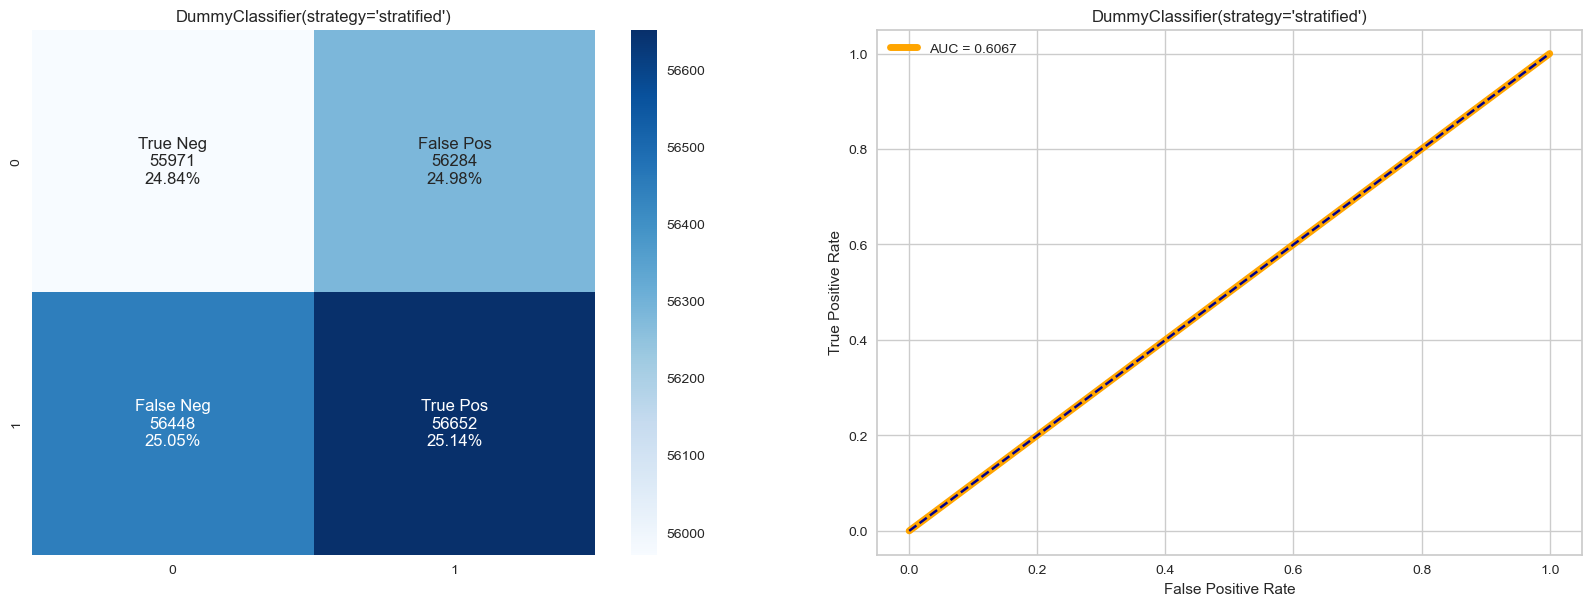

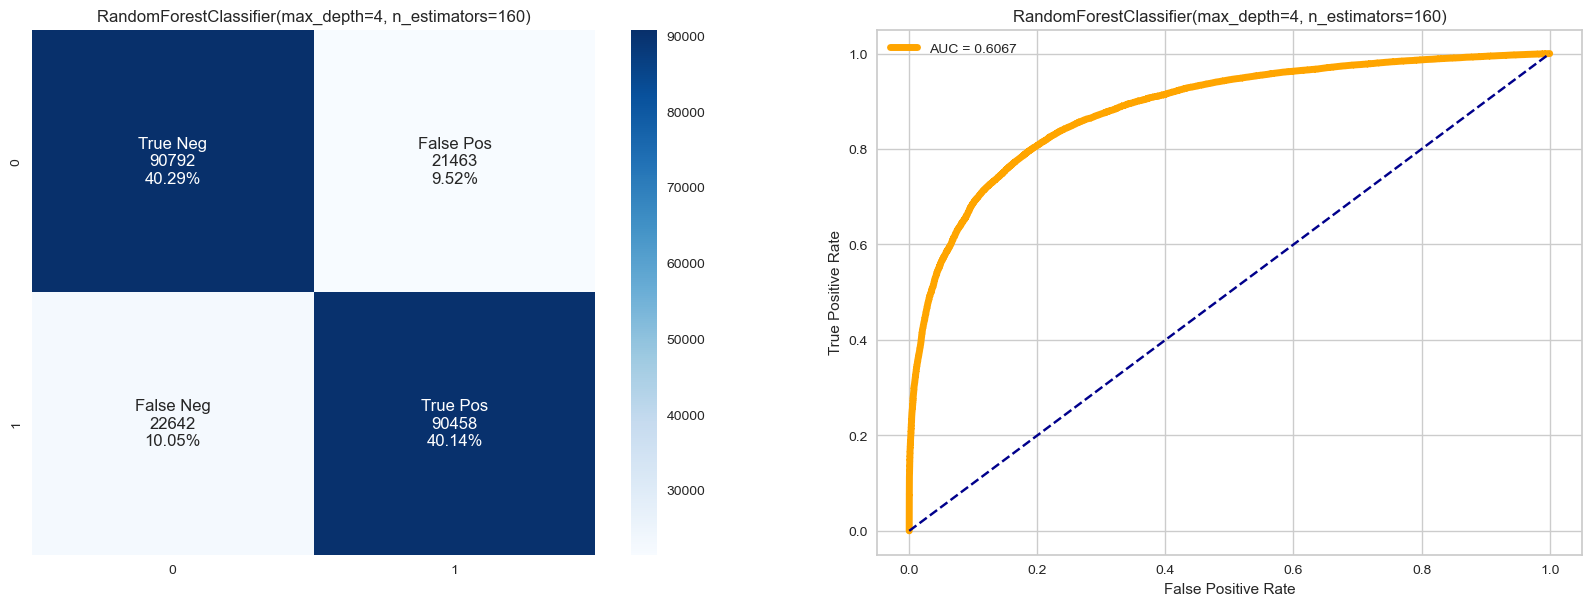

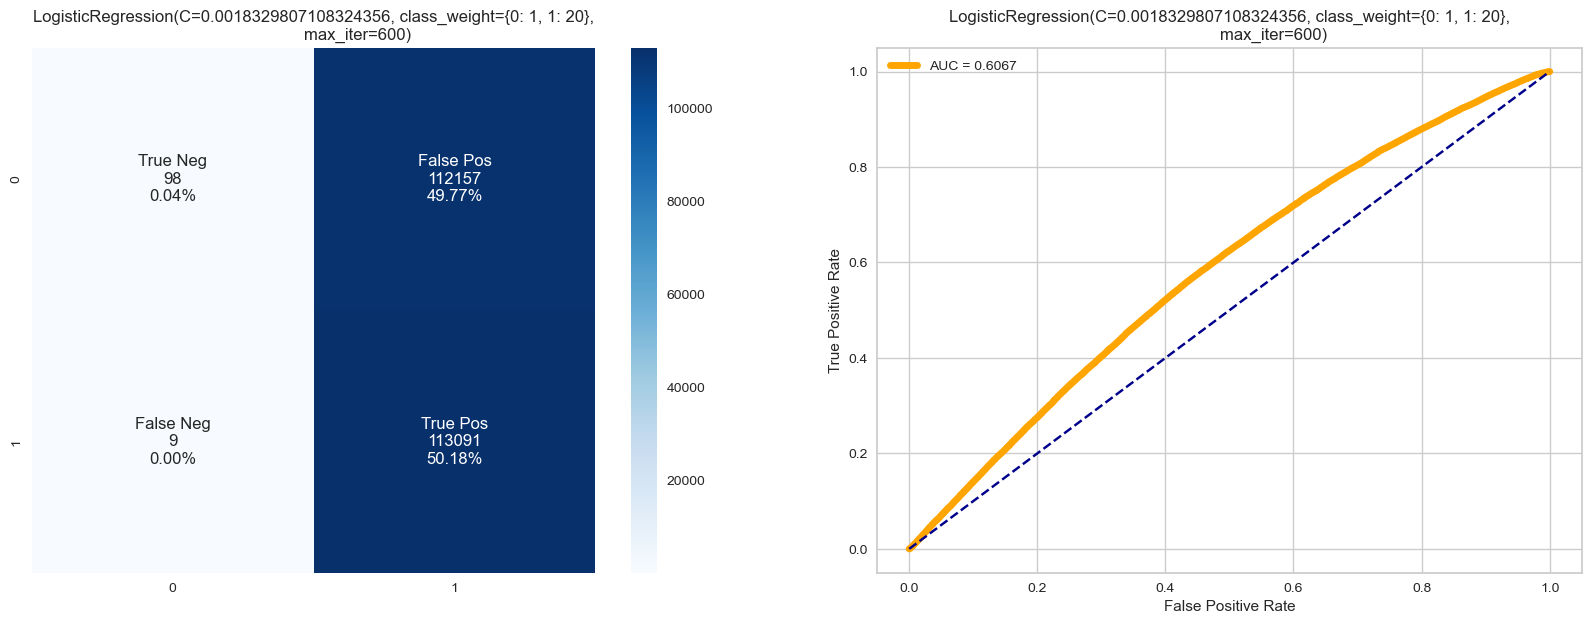

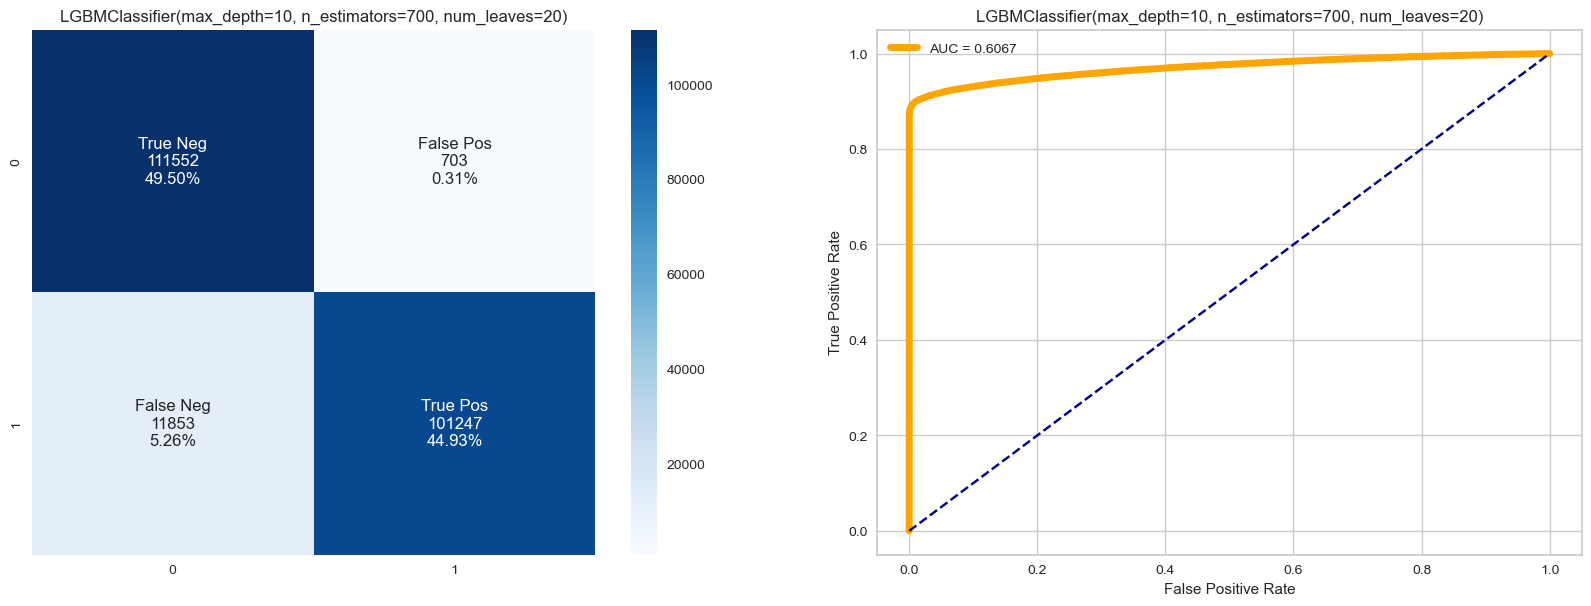

In [56]:
for model in models:   
    model.fit(X_train_1, y_train_1)
    cf_matrix_roc_auc(model, y_test_1, model.predict(X_test_1), model.predict_proba(X_test_1)[:,1])
    

In [146]:
# ESSAI EXCEPTIONNEL Giulio

from sklearn.metrics import roc_curve

dum_model = DummyClassifier(strategy='stratified')
rf_model = RandomForestClassifier(max_depth=4, n_estimators=160)
lr_model = LogisticRegression(C=0.0001, class_weight={0: 1, 1: 20}, max_iter=600)
lgb_model = LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)

#  Pour supporter les charactères JSON spéciaux dans la colonne .
X_test_1 = X_test_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

dum_model.fit(X_test_1,y_test_1)
rf_model.fit(X_test_1,y_test_1)
lr_model.fit(X_test_1,y_test_1)
lgb_model.fit(X_test_1,y_test_1)

fp_lgb, tp_lgb, treshold_lgb = roc_curve(y_test_1, lgb_model.predict_proba(X_test_1)[:, 1])
fp_rf, tp_rf, treshold_rf = roc_curve(y_test_1, rf_model.predict_proba(X_test_1)[:, 1])
fp_lr, tp_lr, treshold_lr = roc_curve(y_test_1, lr_model.predict_proba(X_test_1)[:, 1])
fp_dum, tp_dum, treshold_dum = roc_curve(y_test_1, dum_model.predict_proba(X_test_1)[:, 1])

In [147]:
# ESSAI EXCEPTIONNEL

from sklearn.metrics import roc_auc_score


auc_score_lgb = roc_auc_score(y_test_1, lgb_model.predict_proba(X_test_1)[:, 1])
auc_score_rf = roc_auc_score(y_test_1, rf_model.predict_proba(X_test_1)[:, 1])
auc_score_lr = roc_auc_score(y_test_1, lr_model.predict_proba(X_test_1)[:, 1])
auc_score_dum = roc_auc_score(y_test_1, dum_model.predict_proba(X_test_1)[:, 1])

lst_auc_score = [("LGBMClassifier", auc_score_lgb),
                ("Random Forest", auc_score_rf),
                ("Logistic Regression", auc_score_lr),
                ("Dummy", auc_score_dum)]

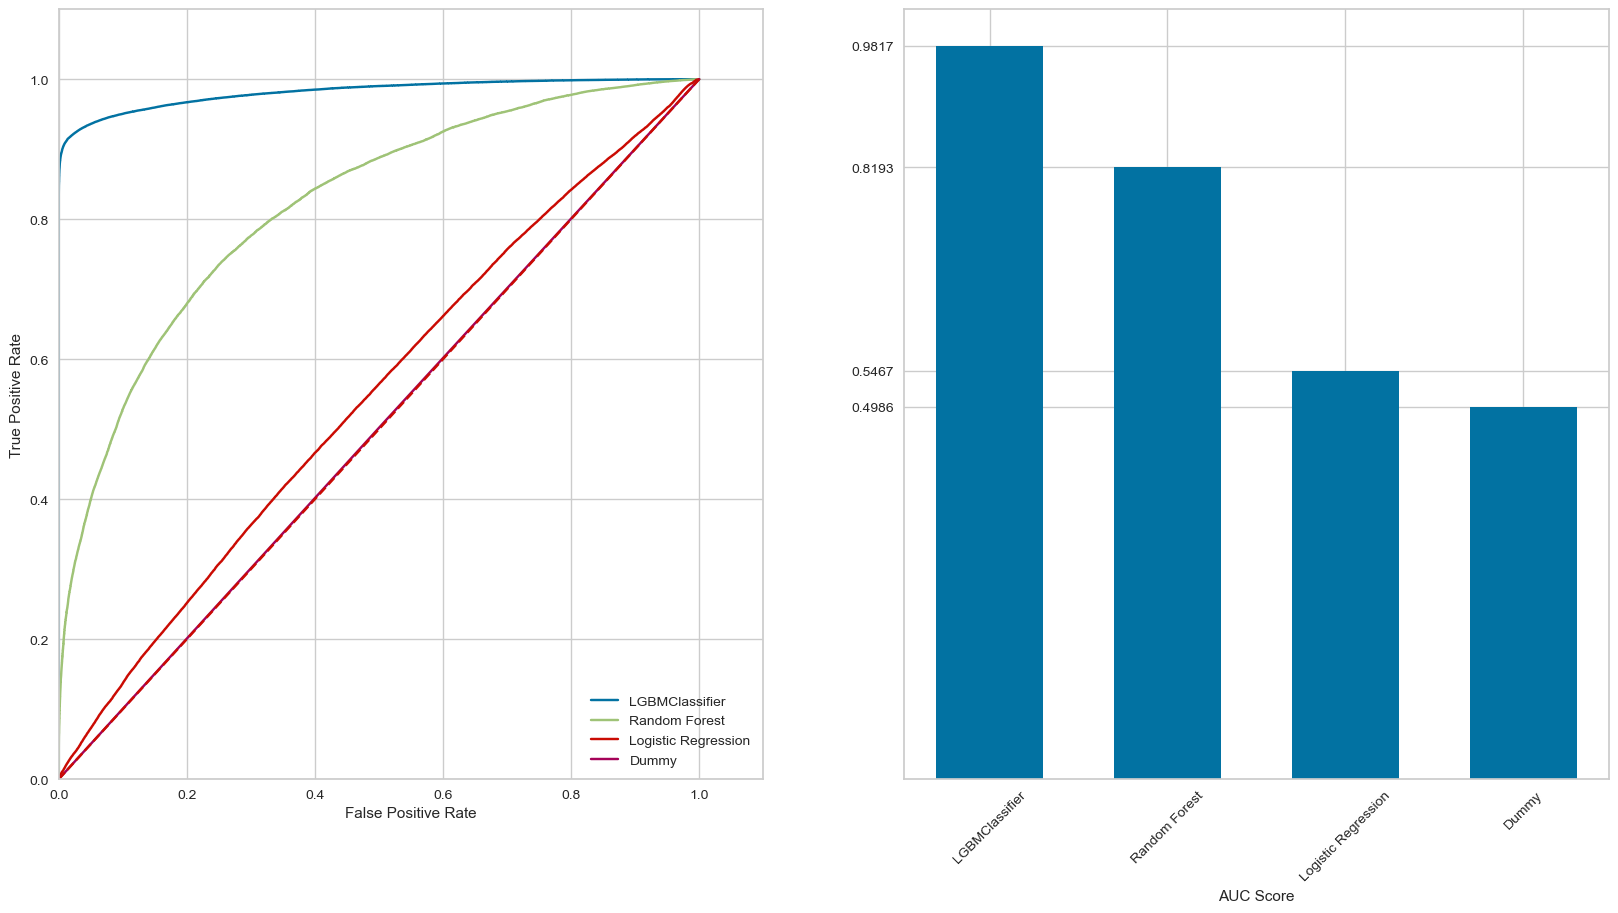

In [148]:
# ESSAI EXCEPTIONNEL

plt.figure(figsize=(20,10))


plt.subplot(1, 2, 1)


plt.plot(fp_lgb, tp_lgb, label="LGBMClassifier")
plt.plot(fp_rf, tp_rf, label="Random Forest")
plt.plot(fp_lr, tp_lr, label="Logistic Regression")
plt.plot(fp_dum, tp_dum, label="Dummy")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(1, 2, 2)

plt.style.use('fivethirtyeight')

labels, ys = zip(*lst_auc_score)

xs = np.arange(len(labels)) 

width = 0.6

plt.bar(xs, ys, width, align='center')

plt.xlabel("AUC Score")
plt.xticks(xs, labels, rotation=45) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.show()

In [57]:
#lgbm = LGBMClassifier(max_depth=6, n_estimators=700, num_leaves=20)
mon_best_model = mon_model

#  Pour supporter les charactères JSON spéciaux dans la colonne .
X_train_1 = X_train_1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

#lgbm.fit(X_train_1, y_train_1)
mon_best_model.fit(X_train_1, y_train_1)

#roc_auc = roc_auc_score(y_test_1, lgbm.predict_proba(X_test_1)[:,1])
roc_auc = roc_auc_score(y_test_1, mon_best_model.predict_proba(X_test_1)[:,1])
print('Mon meilleur modèle:',mon_best_model)
print('AUC : %0.4f' %roc_auc)
#print(classification_report(y_test, lr.predict(X_test)))

Mon meilleur modèle: LGBMClassifier(max_depth=10, n_estimators=700, num_leaves=20)
AUC : 0.9703


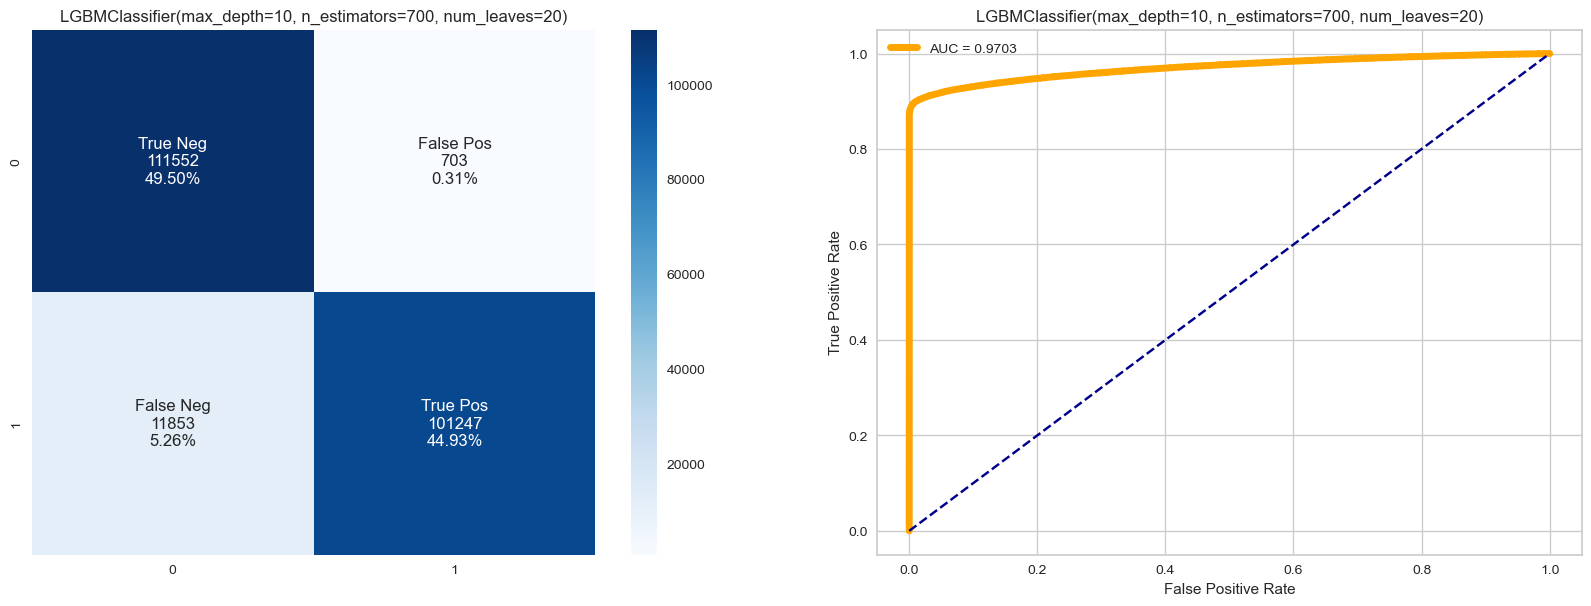

In [58]:
cf_matrix_roc_auc(mon_best_model, y_test_1, mon_best_model.predict(X_test_1), mon_best_model.predict_proba(X_test_1)[:,1])

In [ ]:
# AUTRE lien

In [82]:
'''# build the model
from sklearn.pipeline import make_pipeline, Pipeline

logreg = make_pipeline(
    Preprocessing(numeric_attribute,categoric_attribute), mon_best_model)

# train the model
logreg.fit(X_train, y_train)

# make predictions on the test set
y_pred = logreg.predict(X_test)

# measure accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)'''

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<h2><font color="3337B0">Feature Selection</font></h2>

<h3><font color="3337B0">Les Features les plus importantes de manière globale</font></h3>

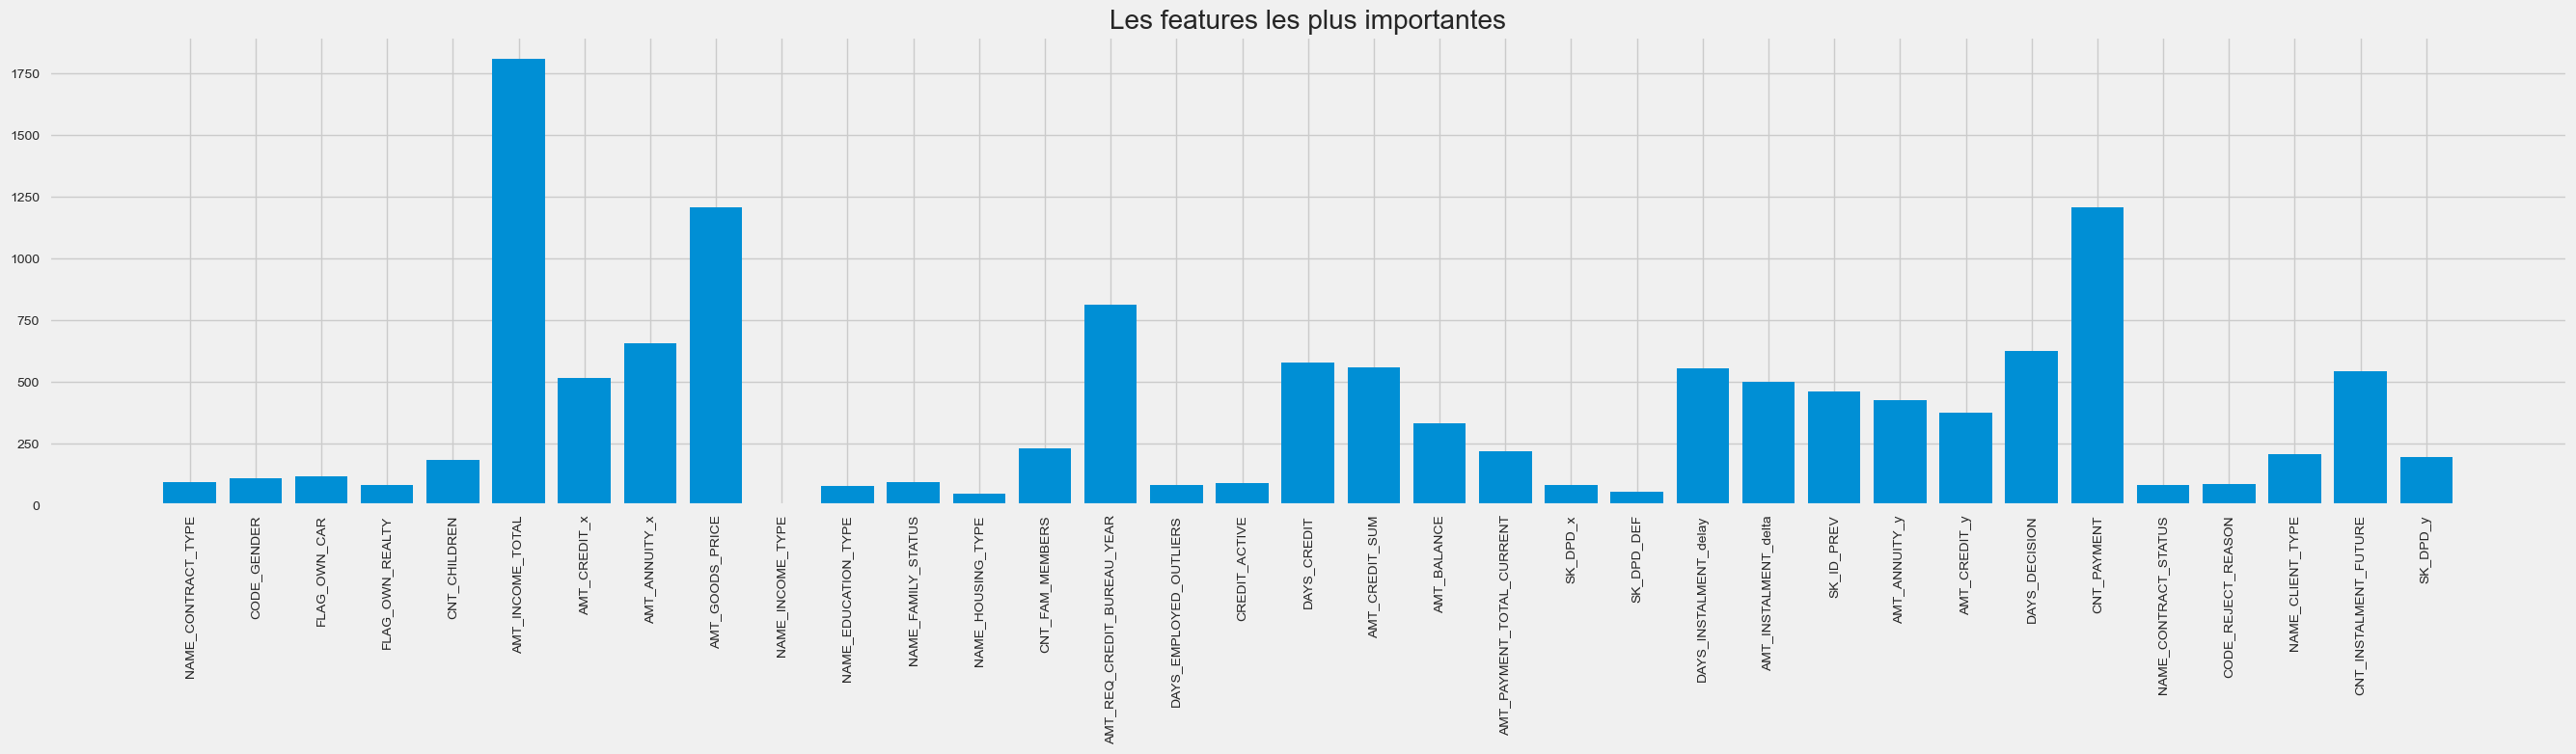

In [161]:
# # LGBMClassifier for feature importance on a classification problem
# from sklearn.datasets import make_classification
# # get importance
# importance = mon_best_model.feature_importances_
# # plot feature importance
# plt.rcParams["figure.figsize"] = (30, 6)
# plt.bar([x for x in range(len(importance))], importance, tick_label = X_train.columns)
# plt.xticks(rotation=90)
# plt.title("Les features les plus importantes")
# plt.show()

In [168]:
# # summarize feature importance
# col = X_train.columns
# col_imp = []
# for i,v in enumerate(importance):
# 	if v >= 100 :
# 		print('%s ---- Score : %.5f' % (col[i],v))

CODE_GENDER ---- Score : 108.00000
FLAG_OWN_CAR ---- Score : 118.00000
CNT_CHILDREN ---- Score : 183.00000
AMT_INCOME_TOTAL ---- Score : 1807.00000
AMT_CREDIT_x ---- Score : 514.00000
AMT_ANNUITY_x ---- Score : 656.00000
AMT_GOODS_PRICE ---- Score : 1205.00000
CNT_FAM_MEMBERS ---- Score : 229.00000
AMT_REQ_CREDIT_BUREAU_YEAR ---- Score : 814.00000
DAYS_CREDIT ---- Score : 577.00000
AMT_CREDIT_SUM ---- Score : 559.00000
AMT_BALANCE ---- Score : 334.00000
AMT_PAYMENT_TOTAL_CURRENT ---- Score : 220.00000
DAYS_INSTALMENT_delay ---- Score : 555.00000
AMT_INSTALMENT_delta ---- Score : 499.00000
SK_ID_PREV ---- Score : 460.00000
AMT_ANNUITY_y ---- Score : 425.00000
AMT_CREDIT_y ---- Score : 374.00000
DAYS_DECISION ---- Score : 626.00000
CNT_PAYMENT ---- Score : 1208.00000
NAME_CLIENT_TYPE ---- Score : 206.00000
CNT_INSTALMENT_FUTURE ---- Score : 544.00000
SK_DPD_y ---- Score : 196.00000


In [155]:
# importance = importance[importance >= 100]

# tab = pd.DataFrame(importance)
# tab = tab.transpose()
# tab.rename(columns=lambda x, y=iter(X_train): next(y), inplace = True)

Text(0.5, 1.0, 'Les features les plus importantes')

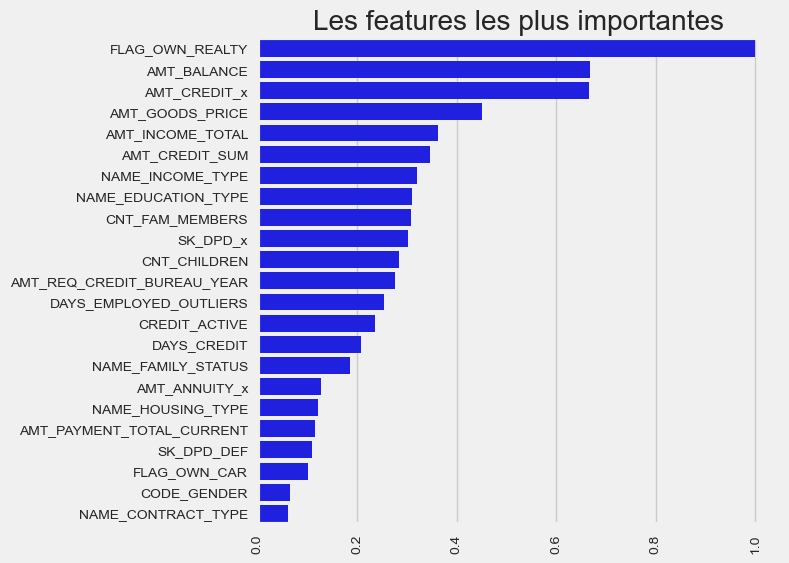

In [156]:
# tab = tab.transpose().sort_values(by=0, ascending = False)

# for column in tab.columns:
#     tab[column] = tab[column]  / tab[column].abs().max()

# plt.rcParams["figure.figsize"] = (6, 6)
# sns.barplot(data=tab.transpose(), color = 'blue', orient='h')
# plt.xticks(rotation=90)
# plt.title("Les features les plus importantes")

In [ ]:
['CODE_GENDER', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CNT_CHILDREN','AMT_INCOME_TOTAL',]

In [59]:
#Affichons les plus importants features avec leur score par ordre décroissant

sorted_idx = np.argsort(mon_best_model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train_1.columns[index], mon_best_model.feature_importances_[index]]) 

['AMT_INCOME_TOTAL', 1282]
['CNT_PAYMENT', 912]
['AMT_GOODS_PRICE', 836]
['AMT_REQ_CREDIT_BUREAU_YEAR', 777]
['SK_ID_PREV', 736]
['AMT_CREDIT_SUM', 714]
['DAYS_DECISION', 687]
['AMT_ANNUITY_x', 649]
['DAYS_CREDIT', 610]
['AMT_CREDIT_x', 581]
['AMT_ANNUITY_y', 552]
['DAYS_INSTALMENT_delay', 539]
['AMT_CREDIT_y', 527]
['CNT_INSTALMENT_FUTURE', 523]
['AMT_INSTALMENT_delta', 471]
['AMT_BALANCE', 353]
['CNT_CHILDREN', 321]
['AMT_PAYMENT_TOTAL_CURRENT', 296]
['CNT_FAM_MEMBERS', 249]
['SK_DPD_y', 244]
['NAME_CLIENT_TYPE', 217]
['CREDIT_ACTIVE', 116]
['CODE_GENDER', 113]
['SK_DPD_x', 111]
['NAME_FAMILY_STATUS', 109]
['NAME_CONTRACT_STATUS', 108]
['SK_DPD_DEF', 107]
['FLAG_OWN_CAR', 103]
['CODE_REJECT_REASON', 96]
['FLAG_OWN_REALTY', 94]
['NAME_EDUCATION_TYPE', 90]
['DAYS_EMPLOYED_OUTLIERS', 77]
['NAME_HOUSING_TYPE', 46]
['NAME_CONTRACT_TYPE', 44]
['NAME_INCOME_TYPE', 10]


In [60]:
def cf_matrix_roc_auc_feat(model, y_true, y_pred, y_pred_proba, feature_importances):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    if feature_importances : 
        plt.subplot(212)
        indices = np.argsort(model.feature_importances_)[::-1]
    X_data = X_train_1
    features = []
    for i in range(20):
        features.append(X_data.columns[indices[i]]) #After RFECV selection > X_data created

    sns.barplot(x=features, y=model.feature_importances_[indices[range(20)]], color=("orange"))
    plt.xlabel('Features importance')
    plt.xticks(rotation=90)

    show()

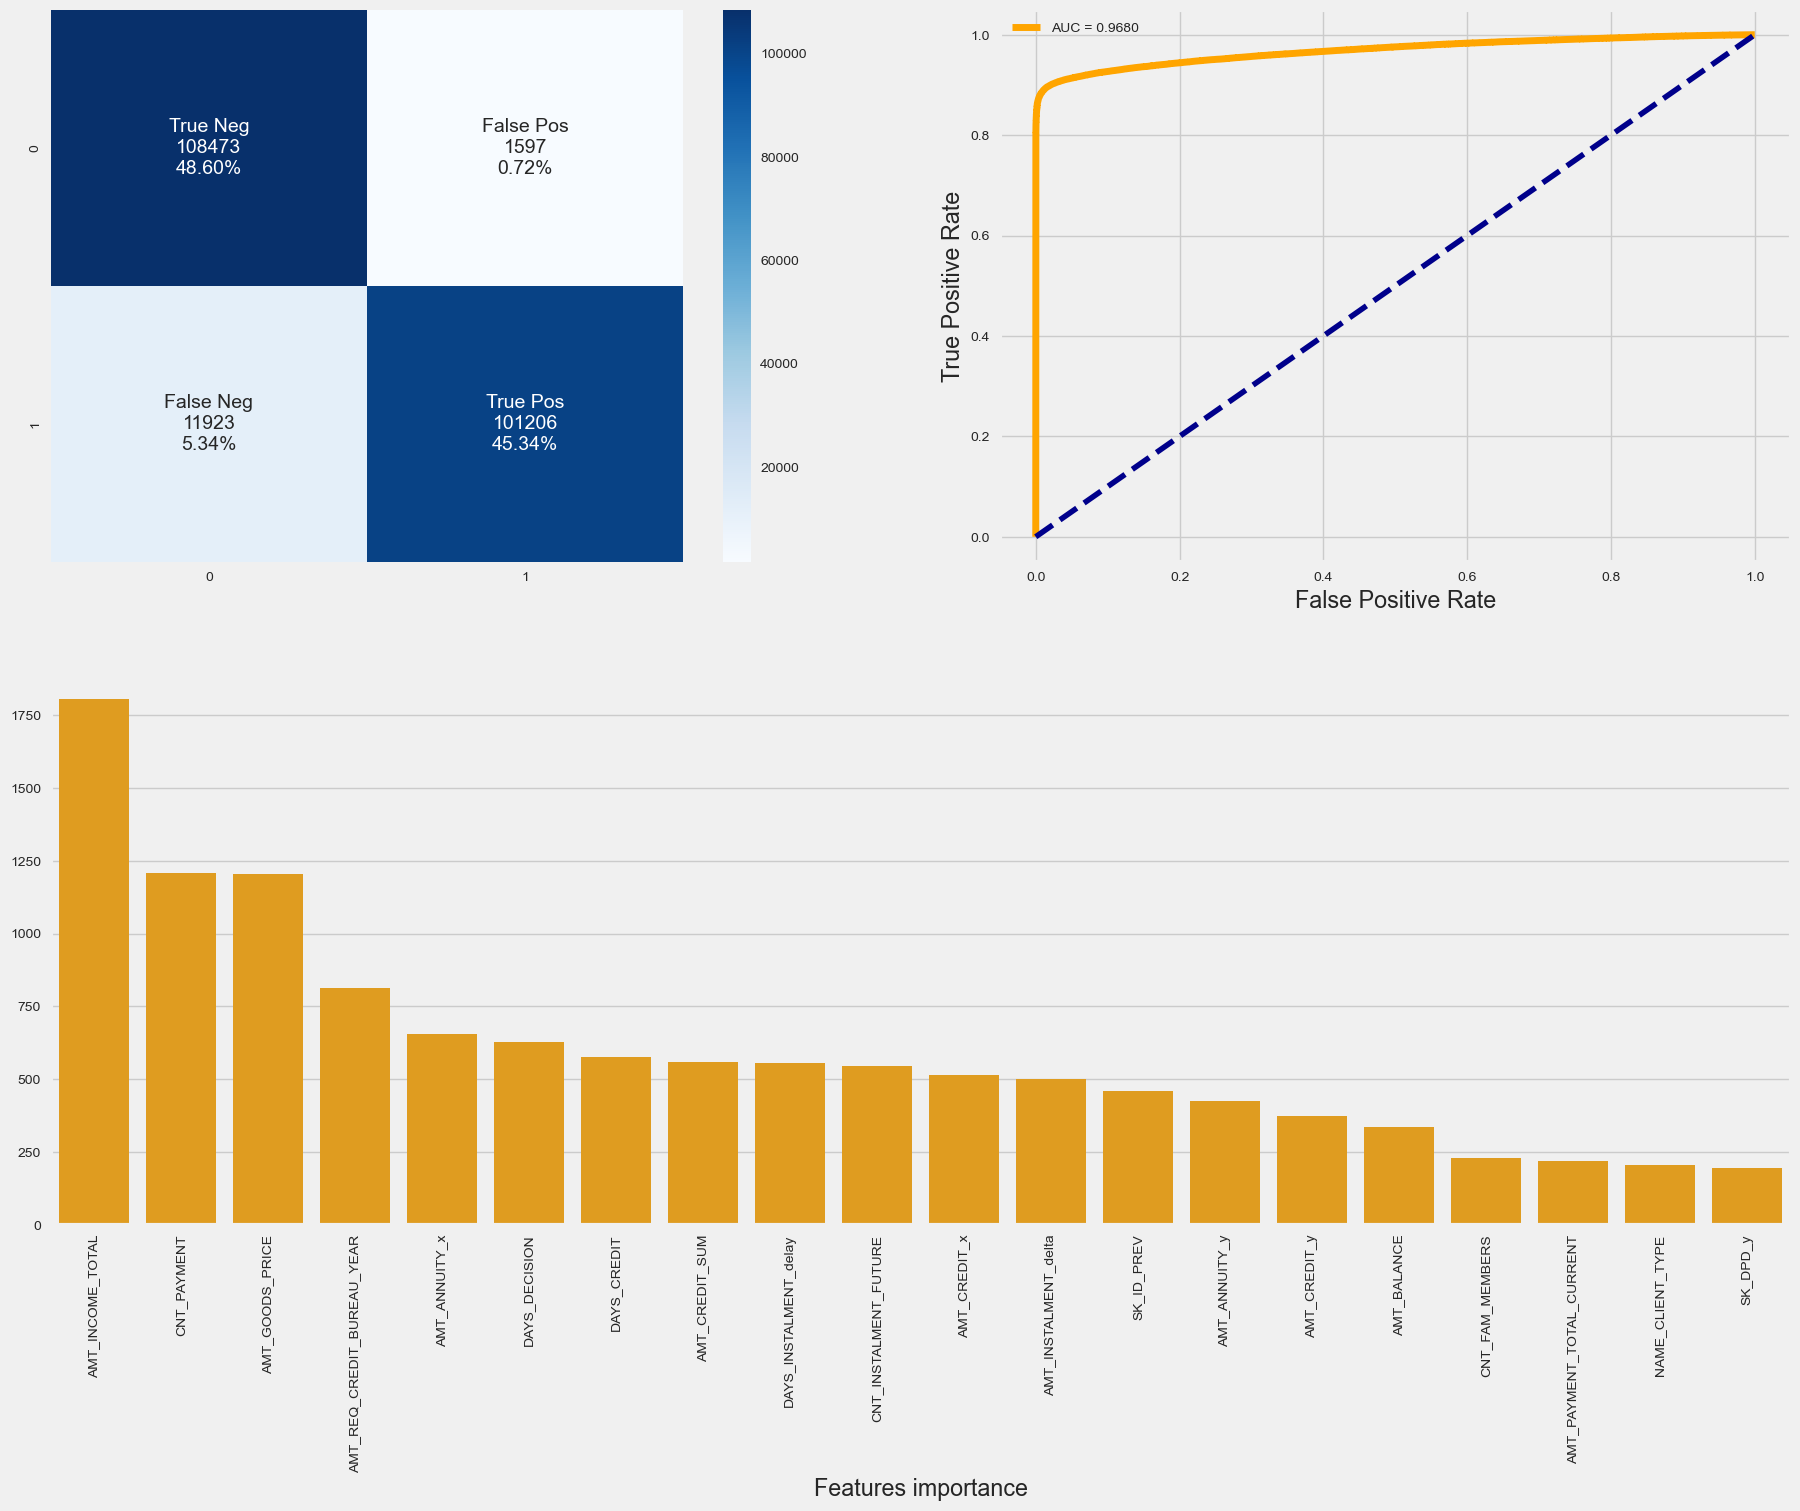

In [177]:
cf_matrix_roc_auc_feat(mon_best_model, y_test_1, mon_best_model.predict(X_test_1), mon_best_model.predict_proba(X_test_1)[:,1], feature_importances=True)

In [ ]:
FIN NALRON

<h4> SABINE    On teste le feature_importance  avec SHAP

<h3><font color="3337B0">Les Features les plus importantes de manière locale</font></h3>

In [61]:
def important_feature_df (classifier, X) :
    X_importance = X
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_importance)
    vals= np.abs(shap_values).mean(0)
    x = pd.DataFrame(X)
    feature_importance = pd.DataFrame(list(zip(x.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    return feature_importance

In [62]:
def feature_importance_graphic(classifier, X):
    X_importance = X
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(X_importance)
    shap.summary_plot(shap_values[1], X_importance)
    shap.summary_plot(shap_values, X_importance, plot_type='bar')
    #shap.force_plot(explainer.expected_value[1], shap_values[1], X)
    
    return 

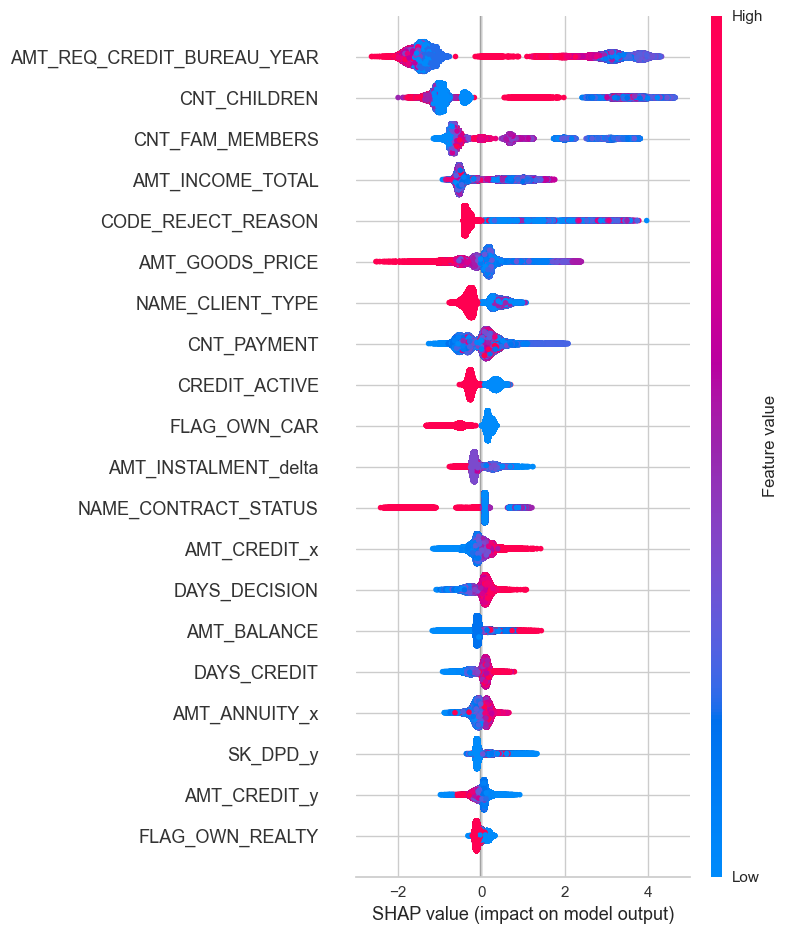

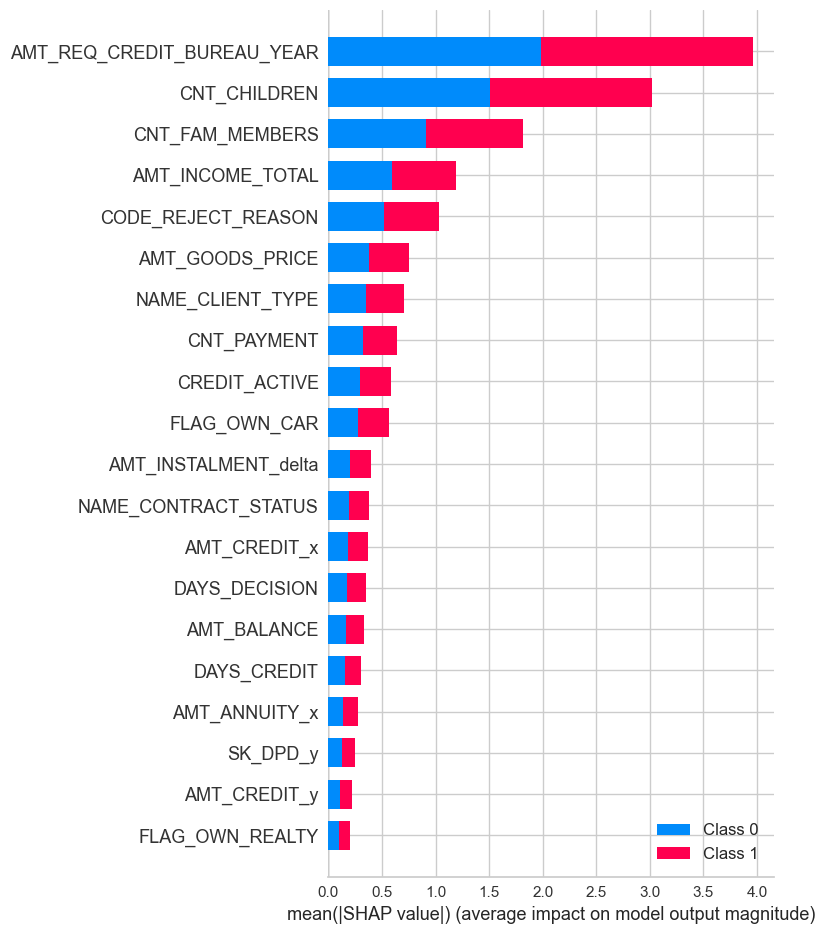

In [63]:
feature_importance_graphic(mon_model,X_train_1)

<div class = "alert alert-block alert-warning">
Tous les petits points sur le graphique représentent une seule observation. L'axe horizontal représente la valeur SHAP, tandis que la couleur du point nous indique si cette observation a une valeur supérieure ou inférieure, par rapport aux autres observations.

<div class = "alert alert-block alert-warning">  
Sur le <b><font color="red">'beeswarm'</font></b> (Le 1er graphique ci-dessus), les caractéristiques sont également classées en fonction de leur effet sur la prédiction, mais nous pouvons également voir comment les valeurs supérieures et inférieures de la caractéristique affecteront le résultat.<br>

<div class = "alert alert-block alert-warning">  
Sur le 1er graphique.<br>
Les valeurs élevées de la variable <b><font color="red">'AMT_GOODS_PRICE'</font></b> ont une contribution négative élevée sur la prédiction, tandis que les valeurs faibles de cette même variable 'AMT_GOODS_PRICE' ont une contribution positive élevée.<br>

<div class = "alert alert-block alert-warning">  
Dans le second graphique, l'importance de la fonctionnalité est organisée par ordre décroissant du plus haut au plus bas. Cet ordre montre l'impact des fonctionnalités sur la prédiction. Il montre la valeur en forme de valeur absolue, de sorte que les prédictions ne sont pas affectées positivement ou négatives.<br>

In [64]:
# Nous allons afficher les features importants et leur valeur shap

explainer = shap.TreeExplainer(mon_model)  
shap_values = explainer.shap_values(X_train_1)


def shap_feature_ranking(data, shap_values, columns=[]):
    if not columns: columns = data.columns.tolist()     # If columns are not given, take all columns
    
    c_idxs = []
    for column in columns: c_idxs.append(data.columns.get_loc(column))  # Get column locations for desired columns in given dataframe
    if isinstance(shap_values, list):   # If shap values is a list of arrays (i.e., several classes)
        means = [np.abs(shap_values[class_][:, c_idxs]).mean(axis=0) for class_ in range(len(shap_values))]  # Compute mean shap values per class 
        shap_means = np.sum(np.column_stack(means), 1)  # Sum of shap values over all classes 
    else:                               # Else there is only one 2D array of shap values
        assert len(shap_values.shape) == 2, 'Expected two-dimensional shap values array.'
        shap_means = np.abs(shap_values).mean(axis=0)
    
    # Put into dataframe along with columns and sort by shap_means, reset index to get ranking
    df_ranking = pd.DataFrame({'feature': columns, 'mean_shap_value': shap_means}).sort_values(by='mean_shap_value', ascending=False).reset_index(drop=True)
    df_ranking.index += 1
    return df_ranking

In [180]:
# shap_feature_ranking(X_train_1, shap_values, columns=[])

In [65]:
shap_feature_ranking(X_train_1, shap_values, columns=[])

,feature,mean_shap_value
1,AMT_REQ_CREDIT_BUREAU_YEAR,3.960649
2,CNT_CHILDREN,3.016725
3,CNT_FAM_MEMBERS,1.817584
4,AMT_INCOME_TOTAL,1.190445
5,CODE_REJECT_REASON,1.030138
6,AMT_GOODS_PRICE,0.752118
7,NAME_CLIENT_TYPE,0.700998
8,CNT_PAYMENT,0.641822
9,CREDIT_ACTIVE,0.586299
10,FLAG_OWN_CAR,0.560360


In [65]:
#dola = shap_feature_ranking(pd.get_dummies(features_sample), shap_values, columns=[])

In [187]:
#Mes_best_features = shap_feature_ranking(X_train_1, shap_values, columns=[])['feature'][:20].to_list()

In [238]:
Features_selected = ['CNT_FAM_MEMBERS','CNT_CHILDREN','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','NAME_INCOME_TYPE','AMT_INCOME_TOTAL','AMT_PAYMENT_TOTAL_CURRENT',
'AMT_CREDIT_SUM','CNT_INSTALMENT_FUTURE','CODE_REJECT_REASON','CREDIT_ACTIVE','DAYS_DECISION',
'DAYS_CREDIT','NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE']

In [66]:
mon_best_model.fit(X_train_1,y_train_1)

LGBMClassifier(max_depth=10, n_estimators=700, num_leaves=20)

In [73]:
mon_best_model

LGBMClassifier(max_depth=10, n_estimators=700, num_leaves=20)

In [69]:
import joblib

In [71]:
# Enregistrons le modèle
PATH = 'C:/Users/User/PROJET_7_avec_FLASK_Api/bin/'
filename = PATH + 'model_7.pkl'
joblib.dump(mon_best_model , filename)

['C:/Users/User/PROJET_7_avec_FLASK_Api/bin/model_7.pkl']